<a href="https://colab.research.google.com/github/Cal-0/Cal-0-dashboard.github.io/blob/master/Clean_MLB_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the tools you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Install so the notebook can navigate Kaggle
!pip install kaggle

In [65]:
# Upload your user authentication from your local files
# The user scraped the data himself and I don't have permission to repuload it 
# on github. This is Kaggles solution.
# You have to upload your Kaggle accounts API token to source the dataset
# this link shows how https://www.youtube.com/watch?v=eEgZtNOCJhk&t=82s
# explanation starts at 1:10
# the file should read kaggle.json as default
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cal456","key":"36f580691299d63624dfae02b9dbbffc"}'}

In [0]:
# Direct the notebook to the dataset on kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [67]:
# Downloads the zip file from the kaggle website to the notebook
!kaggle datasets download -d pschale/mlb-pitch-data-20152018

 96% 313M/328M [00:03<00:00, 78.1MB/s]
100% 328M/328M [00:03<00:00, 93.2MB/s]


In [68]:
# Seperate the different Excel files into CSVs
!unzip mlb-pitch-data-20152018.zip

Archive:  mlb-pitch-data-20152018.zip
  inflating: atbats.csv              
  inflating: ejections.csv           
  inflating: games.csv               
  inflating: pitches.csv             
  inflating: player_names.csv        


In [0]:
# Take the seperated CSVs and turn them into Pandas dataframes
bats_df = pd.read_csv('atbats.csv')
games_df = pd.read_csv('games.csv')
pitches_df = pd.read_csv('pitches.csv')
players_df = pd.read_csv('player_names.csv')

In [71]:
# Show the head of each dataframe in order to isloate what
# columns we want in our final dataframe
players_df.head()

,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [72]:
pitches_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,34.685,-11.960,1.72,3.56,2.0,-6.409,-136.065,-3.995,101.140000,2.280,158.780000,50.0,5.302,4.16,10.93,55.0,3.0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,34.225,-10.085,1.72,3.56,2.0,-8.411,-135.690,-5.980,124.280000,2.119,175.410000,50.0,5.307,6.57,12.00,31.0,5.0,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,35.276,-11.560,1.72,3.56,2.0,-9.802,-137.668,-3.337,136.740000,2.127,150.110000,50.0,5.313,7.61,10.88,49.0,1.0,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,28.354,-20.540,1.74,3.35,2.0,-8.071,-133.005,-6.567,109.685636,2.279,187.463482,50.0,5.210,1.17,6.45,41.0,13.0,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,21.774,-34.111,1.72,3.56,2.0,-6.309,-110.409,0.325,146.527525,2.179,177.242829,50.0,5.557,-8.43,-1.65,18.0,13.0,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [73]:
games_df.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [74]:
bats_df.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [0]:
# From the pitches df we only want 
# type_confidence, code, type, pitch_type, and
# the ab_id. So we drop the rest
pitches_2df = pitches_df.drop(pitches_df.columns[[0, 1,2, 3,4,5,6,7,8,9,10,11,12,13,15,16,17,
                                                  18,19,20,21,22,23,24,25,26,30,31,33,34,35,36,37,38,39]], axis=1) 

In [76]:
# Double check
pitches_2df.head()

,type_confidence,code,type,pitch_type,ab_id
0,2.0,C,S,FF,2.015000e+09
1,2.0,S,S,FF,2.015000e+09
2,2.0,F,S,FF,2.015000e+09
3,2.0,B,B,FF,2.015000e+09
4,2.0,B,B,CU,2.015000e+09


In [0]:
# From the at_bats df we only want
# ab_id, batter_id, event	g_id, pitcher_id, stand
# we drop the rest
bats_df2 = bats_df.drop(bats_df.columns[[4,5,6,7,10]], axis=1) 

In [78]:
# Double check
bats_df2.head()

,ab_id,batter_id,event,g_id,pitcher_id,stand
0,2015000001,572761,Groundout,201500001,452657,L
1,2015000002,518792,Double,201500001,452657,L
2,2015000003,407812,Single,201500001,452657,R
3,2015000004,425509,Strikeout,201500001,452657,R
4,2015000005,571431,Strikeout,201500001,452657,L


In [0]:
# We want everything from the players dataframe
# No need to drop anything

In [0]:
# Combine the bats and pitches dataframes
new_df = pd.merge(bats_df2, pitches_2df, on='ab_id', how='outer')

In [81]:
# Double check
new_df

,ab_id,batter_id,event,g_id,pitcher_id,stand,type_confidence,code,type,pitch_type
0,2015000001,572761,Groundout,201500001,452657,L,2.000,C,S,FF
1,2015000001,572761,Groundout,201500001,452657,L,2.000,S,S,FF
2,2015000001,572761,Groundout,201500001,452657,L,2.000,F,S,FF
3,2015000001,572761,Groundout,201500001,452657,L,2.000,B,B,FF
4,2015000001,572761,Groundout,201500001,452657,L,2.000,B,B,CU
...,...,...,...,...,...,...,...,...,...,...
2867297,2018185573,595879,Single,201802431,623352,R,0.908,D,X,SL
2867298,2018185574,519203,Flyout,201802431,623352,L,0.892,B,B,FF
2867299,2018185574,519203,Flyout,201802431,623352,L,0.898,F,S,FF
2867300,2018185574,519203,Flyout,201802431,623352,L,0.910,S,S,FF


In [0]:
# We need to add the player names
# but the player id's are seperated into batters and pitchers
# we don't need batters so we drop that column so we can
# merge player names on pitcher_id
# g_id and event is redundant, will drop those as well
new_df2 = new_df.drop(new_df.columns[[1,2,3]], axis=1)

In [83]:
new_df2

,ab_id,pitcher_id,stand,type_confidence,code,type,pitch_type
0,2015000001,452657,L,2.000,C,S,FF
1,2015000001,452657,L,2.000,S,S,FF
2,2015000001,452657,L,2.000,F,S,FF
3,2015000001,452657,L,2.000,B,B,FF
4,2015000001,452657,L,2.000,B,B,CU
...,...,...,...,...,...,...,...
2867297,2018185573,623352,R,0.908,D,X,SL
2867298,2018185574,623352,L,0.892,B,B,FF
2867299,2018185574,623352,L,0.898,F,S,FF
2867300,2018185574,623352,L,0.910,S,S,FF


In [0]:
# add a pitcher_id column for the merge
# drop the redundancy
players_df['pitcher_id'] = players_df['id']
players_df = players_df.drop(players_df.columns[[0]], axis=1)

In [85]:
# Double check
players_df.head()

,first_name,last_name,pitcher_id
0,Jon,Lester,452657
1,Adam,Wainwright,425794
2,Phil,Coke,457435
3,Jason,Motte,435400
4,Neil,Ramirez,519166


In [0]:
# merge the dataframe
new_df3 = pd.merge(new_df2, players_df, on='pitcher_id', how='outer')

In [87]:
# it worked, but we have to trim the batter ids
new_df3

,ab_id,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name
0,2.015000e+09,452657,L,2.0,C,S,FF,Jon,Lester
1,2.015000e+09,452657,L,2.0,S,S,FF,Jon,Lester
2,2.015000e+09,452657,L,2.0,F,S,FF,Jon,Lester
3,2.015000e+09,452657,L,2.0,B,B,FF,Jon,Lester
4,2.015000e+09,452657,L,2.0,B,B,CU,Jon,Lester
...,...,...,...,...,...,...,...,...,...
2868183,NaN,582473,NaN,NaN,NaN,NaN,NaN,Sherman,Johnson
2868184,NaN,664702,NaN,NaN,NaN,NaN,NaN,Myles,Straw
2868185,NaN,624641,NaN,NaN,NaN,NaN,NaN,Edmundo,Sosa
2868186,NaN,605612,NaN,NaN,NaN,NaN,NaN,Harold,Castro


In [0]:
# We also need to drop all pitches with a type
# confidence under 2.0 to make sure which pitch was thrown
# this will also drop the batters because they only have NaN values
new_df3['Positive'] = new_df3['type_confidence']==2.000

In [89]:
# Double check
new_df3.head()

,ab_id,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name,Positive
0,2.015000e+09,452657,L,2.0,C,S,FF,Jon,Lester,True
1,2.015000e+09,452657,L,2.0,S,S,FF,Jon,Lester,True
2,2.015000e+09,452657,L,2.0,F,S,FF,Jon,Lester,True
3,2.015000e+09,452657,L,2.0,B,B,FF,Jon,Lester,True
4,2.015000e+09,452657,L,2.0,B,B,CU,Jon,Lester,True


In [90]:
# create a condition so we can check the value counts
condition =  (new_df3['Positive'] == False)
condition

0          False
1          False
2          False
3          False
4          False
           ...  
2868183     True
2868184     True
2868185     True
2868186     True
2868187     True
Name: Positive, Length: 2868188, dtype: bool

In [91]:
# check the value counts
condition.value_counts()

False    1711162
True     1157026
Name: Positive, dtype: int64

In [0]:
# create a new dataframe without the batter ids
# and without 100% certain pitch types
new_df4 = new_df3.drop( new_df3[ new_df3['Positive'] == False ].index)

In [93]:
# Double check
new_df4['Positive'].value_counts()

True    1711162
Name: Positive, dtype: int64

In [94]:
new_df4.head()

,ab_id,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name,Positive
0,2.015000e+09,452657,L,2.0,C,S,FF,Jon,Lester,True
1,2.015000e+09,452657,L,2.0,S,S,FF,Jon,Lester,True
2,2.015000e+09,452657,L,2.0,F,S,FF,Jon,Lester,True
3,2.015000e+09,452657,L,2.0,B,B,FF,Jon,Lester,True
4,2.015000e+09,452657,L,2.0,B,B,CU,Jon,Lester,True


In [0]:
# The 'Positive' column is still there and
# we no longer need it, drop it
new_df5 = new_df4.drop(new_df4.columns[[9]], axis=1)

In [96]:
# Double check
new_df5.head()

,ab_id,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name
0,2.015000e+09,452657,L,2.0,C,S,FF,Jon,Lester
1,2.015000e+09,452657,L,2.0,S,S,FF,Jon,Lester
2,2.015000e+09,452657,L,2.0,F,S,FF,Jon,Lester
3,2.015000e+09,452657,L,2.0,B,B,FF,Jon,Lester
4,2.015000e+09,452657,L,2.0,B,B,CU,Jon,Lester


In [0]:
# We likely won't use ab_id, drop it as well
new_df6 = new_df5.drop(new_df5.columns[[0]], axis=1)

In [98]:
# Double check
new_df6.head()

,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name
0,452657,L,2.0,C,S,FF,Jon,Lester
1,452657,L,2.0,S,S,FF,Jon,Lester
2,452657,L,2.0,F,S,FF,Jon,Lester
3,452657,L,2.0,B,B,FF,Jon,Lester
4,452657,L,2.0,B,B,CU,Jon,Lester


In [0]:
# this is final version of the dataframe we will use to answer our questions
# make it easy and rename it
final_df = new_df6

In [100]:
# Double check and make a copy
fdf = final_df
final_df.head()

,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name
0,452657,L,2.0,C,S,FF,Jon,Lester
1,452657,L,2.0,S,S,FF,Jon,Lester
2,452657,L,2.0,F,S,FF,Jon,Lester
3,452657,L,2.0,B,B,FF,Jon,Lester
4,452657,L,2.0,B,B,CU,Jon,Lester


In [0]:
# Our first question is who had the most swings and misses
# the 'code' for that is 'S'

In [0]:
# Create a boolean column for filtering
fdf['right_types'] = fdf['type']== 'S'

In [103]:
# Double check
fdf.head()

,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name,right_types
0,452657,L,2.0,C,S,FF,Jon,Lester,True
1,452657,L,2.0,S,S,FF,Jon,Lester,True
2,452657,L,2.0,F,S,FF,Jon,Lester,True
3,452657,L,2.0,B,B,FF,Jon,Lester,False
4,452657,L,2.0,B,B,CU,Jon,Lester,False


In [104]:
# check the value counts
fdf['right_types'].value_counts()

False    923894
True     787268
Name: right_types, dtype: int64

In [0]:
# drop the False columns
fdf2 = fdf.drop( fdf[ fdf['right_types'] == False ].index)

In [106]:
# Double check
fdf2['right_types'].value_counts()

True    787268
Name: right_types, dtype: int64

In [0]:
# drop the now redundant column
fdf3 = fdf2.drop(fdf2.columns[[8]], axis=1)

In [108]:
# Double check
fdf3.head()

,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name
0,452657,L,2.0,C,S,FF,Jon,Lester
1,452657,L,2.0,S,S,FF,Jon,Lester
2,452657,L,2.0,F,S,FF,Jon,Lester
11,452657,R,2.0,F,S,SI,Jon,Lester
12,452657,R,2.0,F,S,FF,Jon,Lester


In [0]:
# combine the first_name and last_name columns
fdf3['name'] = fdf3['first_name']+' '+fdf3['last_name']

In [110]:
# double check
fdf3.head()

,pitcher_id,stand,type_confidence,code,type,pitch_type,first_name,last_name,name
0,452657,L,2.0,C,S,FF,Jon,Lester,Jon Lester
1,452657,L,2.0,S,S,FF,Jon,Lester,Jon Lester
2,452657,L,2.0,F,S,FF,Jon,Lester,Jon Lester
11,452657,R,2.0,F,S,SI,Jon,Lester,Jon Lester
12,452657,R,2.0,F,S,FF,Jon,Lester,Jon Lester


In [0]:
# delete redundant columns
fdf4 = fdf3.drop(fdf3.columns[[0, 6,7]], axis=1)

In [112]:
# Double check
fdf4.head()

,stand,type_confidence,code,type,pitch_type,name
0,L,2.0,C,S,FF,Jon Lester
1,L,2.0,S,S,FF,Jon Lester
2,L,2.0,F,S,FF,Jon Lester
11,R,2.0,F,S,SI,Jon Lester
12,R,2.0,F,S,FF,Jon Lester


In [113]:
# See which pitcher through the most whiffs
fdf4['name'].value_counts()

Justin Verlander    5083
Masahiro Tanaka     4820
Gerrit Cole         4677
Carlos Martinez     4318
Chris Archer        4202
                    ... 
Hernan Perez           4
Carlos Gomez           3
Osmer Morales          3
Ryan LaMarre           1
Neal Cotts             1
Name: name, Length: 1175, dtype: int64

In [0]:
# import the graph set you need
import seaborn as sns

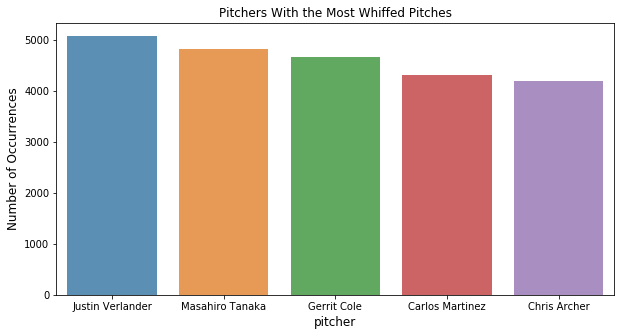

In [115]:
# graph the data
whiff_count  = fdf4['name'].value_counts()
whiff_count = whiff_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(whiff_count.index, whiff_count.values, alpha=0.8)
plt.title('Pitchers With the Most Whiffed Pitches')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('pitcher', fontsize=12)
plt.show()

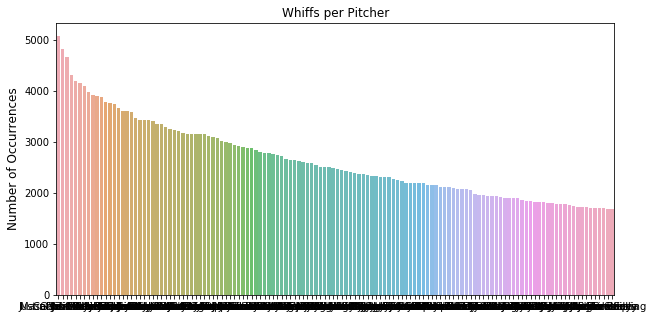

In [136]:
# Quick compare to the rest of the league
whiff_count  = fdf4['name'].value_counts()
whiff_count = whiff_count[:130,]
plt.figure(figsize=(10,5))
sns.barplot(whiff_count.index, whiff_count.values, alpha=0.8)
plt.title('Whiffs per Pitcher')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('', fontsize=1)
plt.xticks()
plt.show()

In [117]:
# This shows us how many of each pitch type was whiffed
fdf4['pitch_type'].value_counts()

FF    293290
SL    130949
FT     84334
CH     74456
SI     64291
CU     63936
FC     41945
KC     19945
FS     11649
KN      1930
FO       260
EP       242
SC        36
FA         5
Name: pitch_type, dtype: int64

In [120]:
# This shows us how many of each pitch type were thrown
new_df5['pitch_type'].value_counts()

FF    606112
SL    277710
FT    196214
CH    178303
SI    144170
CU    142711
FC     90826
KC     42443
FS     26912
KN      4464
EP       612
FO       585
SC        91
FA         9
Name: pitch_type, dtype: int64

In [0]:
from matplotlib.pyplot import pie, axis, show

In [0]:
# Prepare the data for the graph
df = pd.DataFrame({
    'Pitch_Type': ['Fastball', 'Slider', 'Changeup', 'Sinker', 'Curveball', 'Knuckle/ Knuckle Curve' ],
    'Whiffs': [293290, 130949, 74456, 14470, 64291, 21875]})

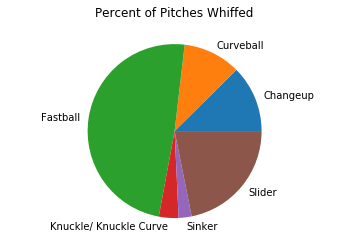

In [123]:
# Graph the data
sums = df.Whiffs.groupby(df.Pitch_Type).sum()
plt.title('Percent of Pitches Whiffed')
axis('equal');
pie(sums, labels=sums.index);
show()

In [0]:
# Prepare the data for the graph
df_pitch_totals = pd.DataFrame({
    'Pitch_Type': ['Fastball', 'Slider', 'Changeup', 'Sinker', 'Curveball', 'Knuckle/ Knuckle Curve' ],
    'Whiffs': [606112, 277710, 178303, 144170, 142711, 47017]})

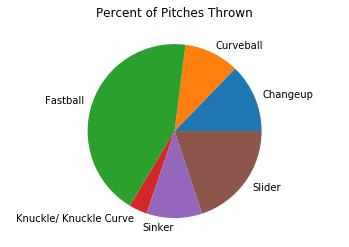

In [125]:
#Graph the data
sums = df_pitch_totals.Whiffs.groupby(df_pitch_totals.Pitch_Type).sum()
plt.title('Percent of Pitches Thrown')
axis('equal');
pie(sums, labels=sums.index);
show()

In [0]:
# Prepare the data for a bar graph
x_values =['Fastball', 'Slider', 'Changeup', 'Sinker', 'Curveball', 'Knuckle/ Knuckle Curve' ]
y_values = [(293290/606112)*10, (130949/277710)*10, (74456/178303)*10, (14470/144170)*10, (64291/142711)*10, (21875/47017)*10]

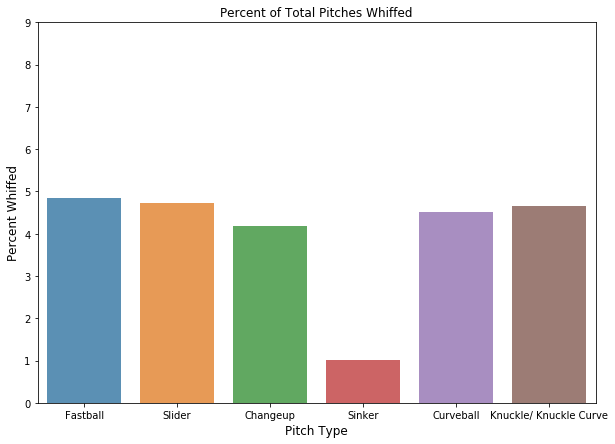

In [133]:
# Graph the data
whiff_count  = df_pitch_type_whiffs['Whiffs']
whiff_count = whiff_count[:6,]
plt.figure(figsize=(10,7))
sns.barplot( x=x_values, y=y_values, alpha=0.8)
plt.title('Percent of Total Pitches Whiffed')
plt.ylabel('Percent Whiffed', fontsize=12)
plt.xlabel('Pitch Type', fontsize=12)
plt.yticks(np.arange(0, 10, step=1))
plt.show()